<a href="https://colab.research.google.com/github/surjkhanal/Customer-Segmentation/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
---

**Customer Segmentation with Machine Learning**

---

---

In [4]:

# DataSet Used
## Run To download dataset

!wget https://github.com/surjkhanal/Customer-Segmentation/raw/master/Orders.csv

--2020-07-05 16:13:59--  https://github.com/surjkhanal/Customer-Segmentation/raw/master/Orders.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/surjkhanal/Customer-Segmentation/master/Orders.csv [following]
--2020-07-05 16:14:00--  https://raw.githubusercontent.com/surjkhanal/Customer-Segmentation/master/Orders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9322372 (8.9M) [text/plain]
Saving to: ‘Orders.csv’

Orders.csv          100%[===================>]   8.89M  18.6MB/s    in 0.5s    

2020-07-05 16:14:00 (18.6 MB/s) - ‘Orders.csv’ saved [9322372/9322372]



**Customer Segmentation in Retail 
Application of K-Means Clustering Algorithm**

> Customer segmentation will be applied to an e-commerce customer database using K-means clustering from scikit-learn 

**The provided customers database is visualized as part of a case study. This project is taking the case study one step further with the following motive:**

Can this customer database be grouped to develop customized relationships?

```To answer this question 3 features will be created and used:```
>* products ordered
>* average return rate
>* total spending


Dataset represents real customers & orders data between November 2018 - April 2019 and it is pseudonymized for confidentiality.



``` Imports```



In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sklearn.metrics as metrics

In [128]:
fname = 'Orders.csv'
data=pd.read_csv(fname)
data.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [129]:
data.shape

(70052, 17)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [131]:
data.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000




```
Removing Negative Order Quantity
```



In [132]:
data = data[data['ordered_item_quantity'] >0]

## 1. Products ordered
It is the count of the products ordered in product_type column by a customer.

In [133]:
def encode_column(column):
    if column > 0:
        return 1
    if column <= 0:
        return 0

def aggregate_by_ordered_quantity(df, column_list):
    aggregated_dataframe = (df.groupby(column_list).ordered_item_quantity.count().reset_index())

    aggregated_dataframe["products_ordered"] = (aggregated_dataframe.ordered_item_quantity.apply(encode_column))

    final_dataframe = (aggregated_dataframe.groupby(column_list[0]).products_ordered.sum().reset_index())
    return final_dataframe

In [134]:
customers = aggregate_by_ordered_quantity(data, ["customer_id", "product_type"])

In [135]:
customers.head(5)

,customer_id,products_ordered
0,1000661,1
1,1001914,1
2,1002167,3
3,1002387,1
4,1002419,2


##2. Average Return Rate
It is the ratio of returned item quantity and ordered item quantity. This ratio is first calculated per order and then averaged for all orders of a customer.

In [136]:
ordered_sum_by_customer_order = (data.groupby(["customer_id", "order_id"]).ordered_item_quantity.sum().reset_index())

returned_sum_by_customer_order = (data.groupby(["customer_id", "order_id"]).returned_item_quantity.sum().reset_index())

ordered_returned_sums = pd.merge(ordered_sum_by_customer_order, returned_sum_by_customer_order)

In [137]:
ordered_returned_sums["average_return_rate"] = (-1 * ordered_returned_sums["returned_item_quantity"] /ordered_returned_sums["ordered_item_quantity"])

In [138]:
ordered_returned_sums.head()

,customer_id,order_id,ordered_item_quantity,returned_item_quantity,average_return_rate
0,1000661,99119989117212,3,0,0.0
1,1001914,79758569034715,1,0,0.0
2,1002167,38156088848638,1,0,0.0
3,1002167,57440147820257,1,0,0.0
4,1002167,58825523953710,1,0,0.0


In [139]:
customer_return_rate = (ordered_returned_sums.groupby("customer_id").average_return_rate.mean().reset_index())

In [140]:
return_rates = pd.DataFrame(customer_return_rate["average_return_rate"].value_counts().reset_index())

return_rates.rename(columns=
                    {"index": "average return rate",
                     "average_return_rate": "count of unit return rate"},
                    inplace=True)

return_rates.sort_values(by="average return rate")

,average return rate,count of unit return rate
0,0.000000,24823
9,0.013889,1
10,0.066667,1
8,0.083333,1
12,0.125000,1
5,0.166667,2
6,0.200000,2
4,0.250000,5
1,0.333333,13
11,0.400000,1


In [141]:
customers = pd.merge(customers,customer_return_rate,on="customer_id")

## 3. Total spending
Total spending is the aggregated sum of total sales value which is the amount after the taxes and returns.

In [142]:
customer_total_spending = (data.groupby("customer_id").total_sales.sum().reset_index())

customer_total_spending.rename(columns = {"total_sales" : "total_spending"},
                               inplace = True)

## Create features data frame

In [143]:
customers = customers.merge(customer_total_spending, on="customer_id")

In [144]:
print("The number of customers from the existing customer base:", customers.shape[0])

The number of customers from the existing customer base: 24874


In [145]:
customers.drop(columns="customer_id",inplace=True)

In [146]:
customers.head()

,products_ordered,average_return_rate,total_spending
0,1,0.0,260.0
1,1,0.0,79.2
2,3,0.0,234.2
3,1,0.0,89.0
4,2,0.0,103.0


In [147]:
def scale(x):
    return (x-np.mean(x))/(np.std(x))
data_scaled=customers.apply(scale,axis=0)

In [148]:
data_scaled

,products_ordered,average_return_rate,total_spending
0,-0.681051,-0.038412,0.401847
1,-0.681051,-0.038412,-0.654865
2,1.156708,-0.038412,0.251055
3,-0.681051,-0.038412,-0.597588
4,0.237829,-0.038412,-0.515763
...,...,...,...
24869,0.237829,-0.038412,0.396003
24870,0.237829,-0.038412,0.299566
24871,-0.681051,-0.038412,-0.597588
24872,0.237829,-0.038412,0.442760


## Create K-means model

In [149]:

k=range(1,10)
wss=[]
for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans=kmeans.fit(customers)
    wss.append(sum(np.min(cdist(customers,kmeans.cluster_centers_,'euclidean'),axis=1))/customers.shape[0])

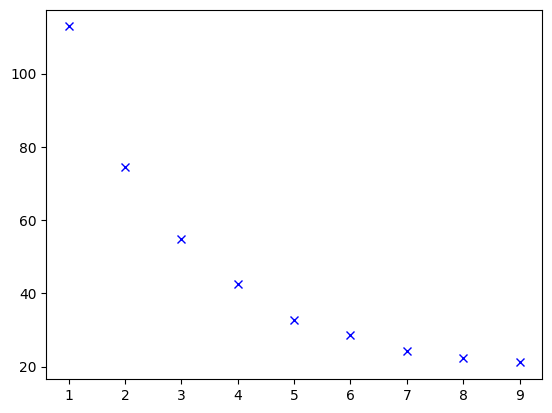

In [150]:
plt.plot(k,wss,'bx')

In [151]:
max=0
n=1
for i in range(2,10):
    labels=KMeans(n_clusters=i,random_state=200).fit(data_scaled).labels_
    score=metrics.silhouette_score(data_scaled,labels,metric='euclidean',sample_size=10000,random_state=200)
    if score>max:
        max,n=score,i

print('Best Suitable Number Of Clustor =>>',n)

Best Suitable Number Of Clustor =>> 3


In [152]:
labels=KMeans(n_clusters=n,random_state=200).fit(data_scaled).labels_

In [153]:
customers['Level']=labels

In [154]:
size=[]
name=[]
for i in range(n):
    size.append(customers[customers.Level==i].shape[0])
    name.append(i)
size,name

([19957, 4892, 25], [0, 1, 2])

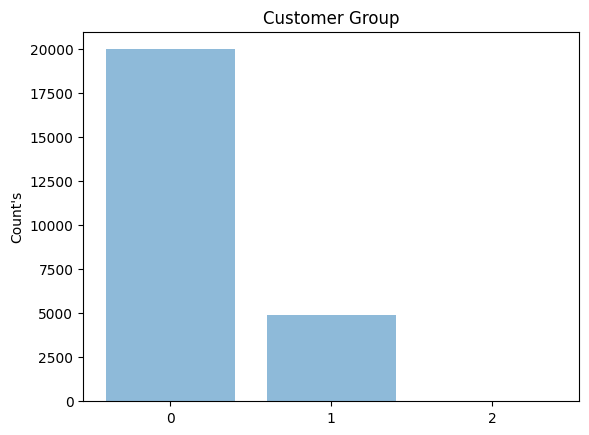

In [155]:
x = name
y = np.arange(len(x))
h = size

plt.bar(y, h, align='center', alpha=0.5)
plt.xticks(y, x)
plt.ylabel("Count's")
plt.title('Customer Group')


plt.show()